# Predicting sentiment from product reviews

## Constants

In [1]:
import pandas as pd
import bokeh
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn import model_selection

%matplotlib inline

## Get Data

Loading reviews for a set of baby products. 

In [2]:
products = pd.read_csv("data/amazon_baby.csv")

Data includes the product name, the review text and the rating of the review. 

In [3]:
print(products.shape)
products.head()

(183531, 3)


,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


### Basic exploration

##### Data types and Column names

In [4]:
products.dtypes

name      object
review    object
rating     int64
dtype: object

##### Total unique products

In [5]:
len(products.name.unique())

32418

##### Frequency count for each product

In [6]:
product_count = products.name.value_counts()
product_count[0:9]

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
Fisher-Price Booster Seat, Blue/Green/Gray                                  489
Fisher-Price Rainforest Jumperoo                                            450
Graco Nautilus 3-in-1 Car Seat, Matrix                                      419
Leachco Snoogle Total Body Pillow                                           388
Name: name, dtype: int64

##### Plotting the top 15 products based on number of reviews

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

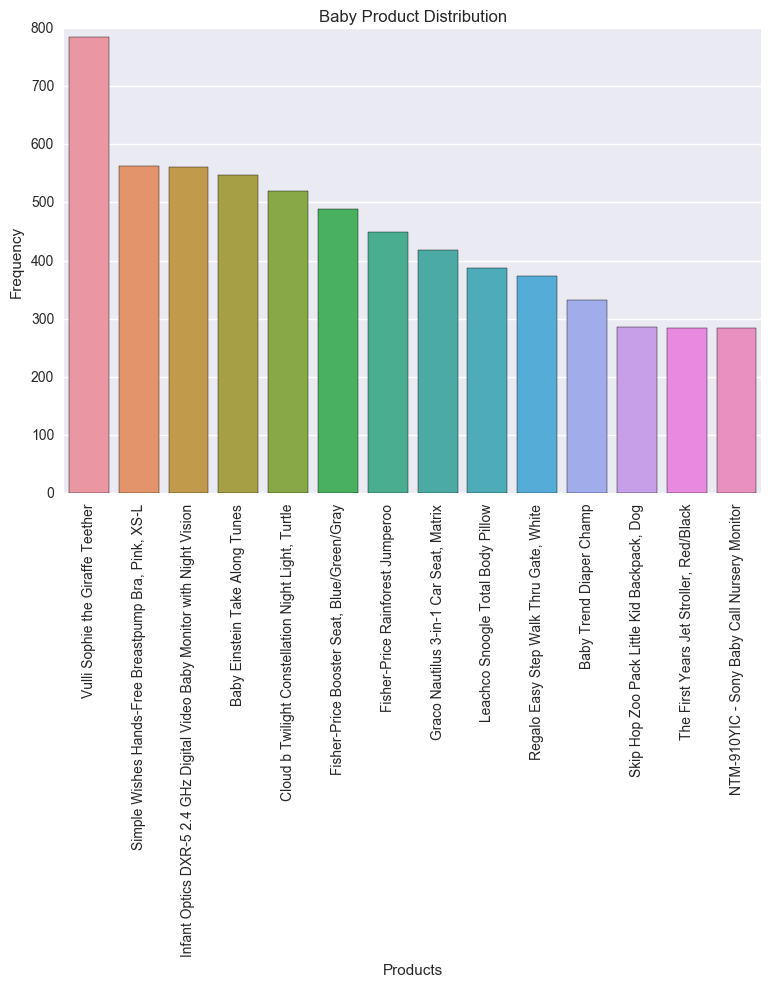

In [7]:
plt.figure(figsize=(9,6))
sns.barplot(x=product_count[0:14].index, y=product_count[0:14])
plt.title('Baby Product Distribution')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

##### Examining the ratings distibution for top 15 products

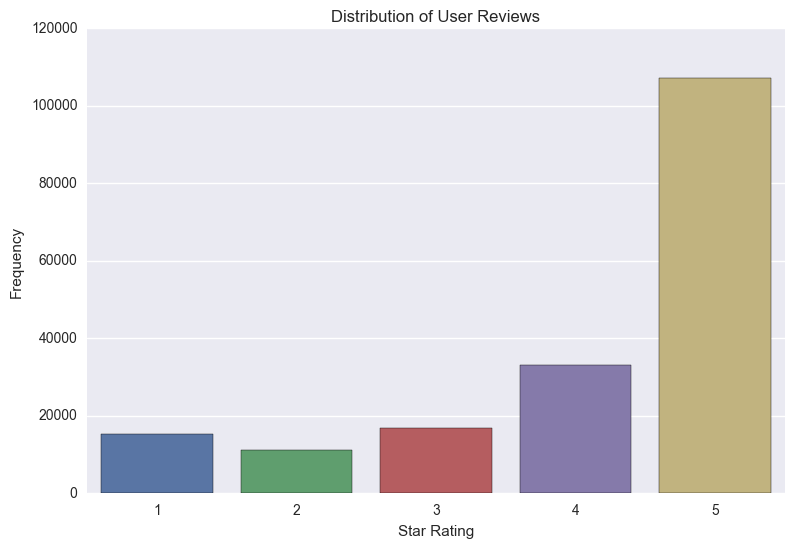

In [8]:
rating_count = products.rating.value_counts()
plt.figure(figsize=(9,6))
sns.barplot(x=rating_count[0:14].index, y=rating_count[0:14])
plt.title('Distribution of User Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')

##### Examining the ratings for most-reviewed product:  'Vulli Sophie the Giraffe Teether'

Product details as part of the lecture, hence no code for verification.

In [9]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [10]:
giraffe_reviews['rating'].describe()

count    785.000000
mean       4.294268
std        1.227358
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

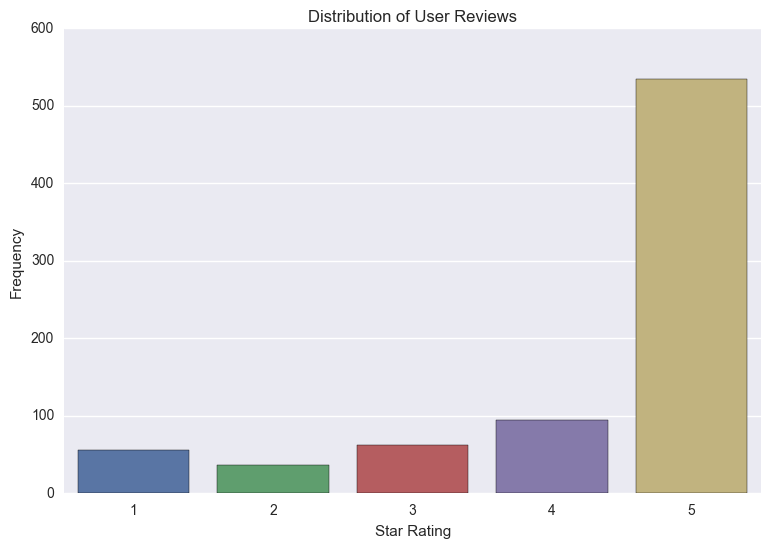

In [11]:
rating_count = giraffe_reviews.rating.value_counts()
plt.figure(figsize=(9,6))
sns.barplot(x=rating_count.index, y=rating_count)
plt.title('Distribution of User Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')

## Data Transformations

In [12]:
def string_to_dict(string):
    string = str(string)
    string = string.lower()
    wordlist = string.split()
    wordfreq = []
    for w in wordlist:
        wordfreq.append(wordlist.count(w))
    
    word_dict = dict(zip(wordlist, wordfreq))
    return(word_dict)

In [13]:
products["word_count"] = products["review"]
products["word_count"] = products["word_count"].apply(string_to_dict)

In [14]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'replace': 1, 'need': 1, 'flannel': 1, 'no': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'does': 1, 'disappointed.': 1, 'not'..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'quilt': 1, 'it': 1, 'the': 1, 'soft': 1, 'lo..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'little': 1, 'positive,': 1, 'found': 1, 'bin..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'work': 1, 'found': 1, 'all': 2, 'ween': 1, '..."


## Build a sentiment classifier

##### Defining Sentiment

We will ignore all reviews with rating = 3 which in this case is considered neutral.  Reviews with a rating of 4 or higher will be considered positive or `True`, while the ones with rating of 2 or lower will have a negative sentiment (or `False`)   

In [15]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

In [16]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [17]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'does': 1, 'disappointed.': 1, 'not'...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'quilt': 1, 'it': 1, 'the': 1, 'soft': 1, 'lo...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'little': 1, 'positive,': 1, 'found': 1, 'bin...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'work': 1, 'found': 1, 'all': 2, 'ween': 1, '...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'parent': 1, 'it': 1, 'any': 2, 'does': 1, 'w...",True


##### Train, Test

In [18]:
random.seed(1234)
train_data,test_data = model_selection.train_test_split(products, test_size = 0.2)

In [19]:
print(train_data.shape)
test_data.shape

(133401, 5)


(33351, 5)

##### Logistic Classifier

In [18]:
sentiment_model = graphlab.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=['word_count'],
                                                     validation_set=test_data)

PROGRESS: Logistic regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 133448
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 1
PROGRESS: Number of unpacked features : 219217
PROGRESS: Number of coefficients    : 219218
PROGRESS: Starting L-BFGS
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+-----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+----------+-----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 5        | 0.000002  | 1.737795     | 0.841481          | 0.839989            |
PROGRESS: | 2         | 9        | 3.000000  | 2.388519     | 0.947425          | 0.894877            |
PROGRESS: | 3         | 10       | 3.000000  | 2.630476     | 0.92

#Evaluate the sentiment model

In [19]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +------------------+----------------+------------------+-------+------+
 |    threshold     |      fpr       |       tpr        |   p   |  n   |
 +------------------+----------------+------------------+-------+------+
 |       0.0        | 0.216672925272 | 0.00536278722875 | 28157 | 5326 |
 | 0.0010000000475  | 0.783327074728 |  0.994637212771  | 28157 | 5326 |
 | 0.00200000009499 | 0.744461134059 |  0.993323152324  | 28157 | 5326 |
 | 0.00300000002608 | 0.722305670297 |  0.992577334233  | 28157 | 5326 |
 | 0.00400000018999 | 0.707097258731 |  0.992044607025  | 28157 | 5326 |
 | 0.00499999988824 | 0.695456252347 |  0.991760485847  | 28157 | 5326 |
 | 0.00600000005215 | 0.686068343973 |  0.991156728345  | 28157 | 5326 |
 | 0.00700000021607 | 0.675553886594 |  0.990766061725  | 28157 | 5326 |
 | 0.00800000037998 | 0.665790461885 |  0.990339879959  | 28157 | 5326 |
 | 0.00899999961257 

In [20]:
sentiment_model.show(view='Evaluation')

#Applying the learned model to understand sentiment for Giraffe

In [20]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')

In [21]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ...",0.999513023521
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ...",0.999320678306
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2, 'all': 1,'latex.': 1, 'being': 1, ...",0.013558811687
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2, 'one!': 1,'all': 1, 'love': 1, ...",0.995769474148
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3, 'all': 1,'old': 1, 'her.': 1, ...",0.662374415673
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6, 'seven': 1,'already': 1, 'love': 1, ...",0.999997148186
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4, 'drooling,':1, 'love': 1, 'her.': 1, ...",0.989190989536
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3, 'chew': 1,""don't"": 1, 'is': 1, ...",0.999563518413
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2, 'because': 1,'just': 2, 'what': 1, ...",0.970160542725
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2, 'already': 1,'in': 1, 'some': 1, ' ...",0.195367644588


##Sort the reviews based on the predicted sentiment and explore

In [22]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [24]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'food' ...",1.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'peace': 1, 'month': 1,'bright': 1, 'softer' ...",0.999999999703
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2, 'pops': 1,'existence.': 1, ...",0.999999999392
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2, ""don't"": 1,'(literally).so': 1, ...",0.99999999919
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1, 'all': 1,'reviews.': 2, 'just' ...",0.999999998657
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2, 'both': 1,'month': 1, 'ears,': 1, ...",0.999999997108
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5, 'the': 1,'all': 1, 'that': 2, ...",0.999999995589
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1, 'shape': 2,'mutt': 1, '""dog': 1, ...",0.999999995573
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4, 'chew': 1,'all': 1, 'perfect;': 1, ...",0.999999989527
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1, 'all': 1,'out,': 1, 'over': 1, ...",0.999999985069


##Most positive reviews for the giraffe

In [25]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [26]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

##Show most negative reviews for giraffe

In [27]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [28]:
giraffe_reviews[-2]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

## Submission

In [1]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']